## Image Compression with DWT

In [ ]:
!pip install pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 84.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pywt
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive



def load_images_from_folder(folder):
    """Loads all grayscale images from the given folder."""
    images = []
    filenames = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
            filenames.append(filename)
    return images, filenames

def apply_dwt(image):
    """Applies 2D DWT to the image and returns approximation coefficients (cA)."""
    coeffs2 = pywt.dwt2(image, 'haar')
    cA, (cH, cV, cD) = coeffs2  # Extract approximation and detail coefficients
    return cA

def save_compressed_image(cA, output_path):
    """Saves the approximation coefficients (cA) as an image file."""
    cA_normalized = np.uint8(np.abs(cA) / np.max(np.abs(cA)) * 255)
    cv2.imwrite(output_path, cA_normalized)

def compare_image_sizes(original_folder, compressed_folder, filenames):
    """Compares the sizes of original and compressed images."""
    comparison_data = []

    for filename in filenames:
        original_path = os.path.join(original_folder, filename)
        compressed_path = os.path.join(compressed_folder, filename)

        try:
            original_size = os.path.getsize(original_path)
            compressed_size = os.path.getsize(compressed_path)
            comparison_data.append([filename, original_size, compressed_size])
        except Exception as e:
            print(f"Error comparing {filename}: {e}")
            continue

    # Create a DataFrame to display the comparison
    df = pd.DataFrame(comparison_data, columns=['Filename', 'Original Size (bytes)', 'Compressed Size (bytes)'])
    return df

def visualize_dwt(cA, coeffs):
    """Visualizes the DWT results for a single image."""
    cH, cV, cD = coeffs
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 2, 1)
    plt.title('Approximation')
    plt.imshow(cA, cmap='gray')
    plt.subplot(2, 2, 2)
    plt.title('Horizontal Details')
    plt.imshow(cH, cmap='gray')
    plt.subplot(2, 2, 3)
    plt.title('Vertical Details')
    plt.imshow(cV, cmap='gray')
    plt.subplot(2, 2, 4)
    plt.title('Diagonal Details')
    plt.imshow(cD, cmap='gray')
    plt.show()

In [ ]:

# Mount Google Drive
drive.mount('/content/drive')
original_folder = "/content/drive/MyDrive/UBI_images/amplitude"  # Replace with your folder path
compressed_folder = "/content/drive/MyDrive/compressed_images"  # Folder to store compressed images

# Ensure the compressed images folder exists
if not os.path.exists(compressed_folder):
    os.makedirs(compressed_folder)


Mounted at /content/drive


                  Filename  Original Size (bytes)  Compressed Size (bytes)
0    amp_2986.0-2992.0.png                  18354                     6171
1    amp_2980.0-2986.0.png                  11947                     3548
2    amp_2998.0-3004.0.png                  17248                     5623
3    amp_2968.0-2974.0.png                  11227                     3570
4    amp_2992.0-2998.0.png                  21126                     6604
..                     ...                    ...                      ...
920  amp_8449.3-8455.3.png                  18221                     4986
921  amp_8515.3-8519.6.png                   2731                     1048
922  amp_8431.3-8437.3.png                  18377                     5018
923  amp_8425.3-8431.3.png                  17808                     4833
924  amp_8509.3-8515.3.png                   5122                     1338

[925 rows x 3 columns]


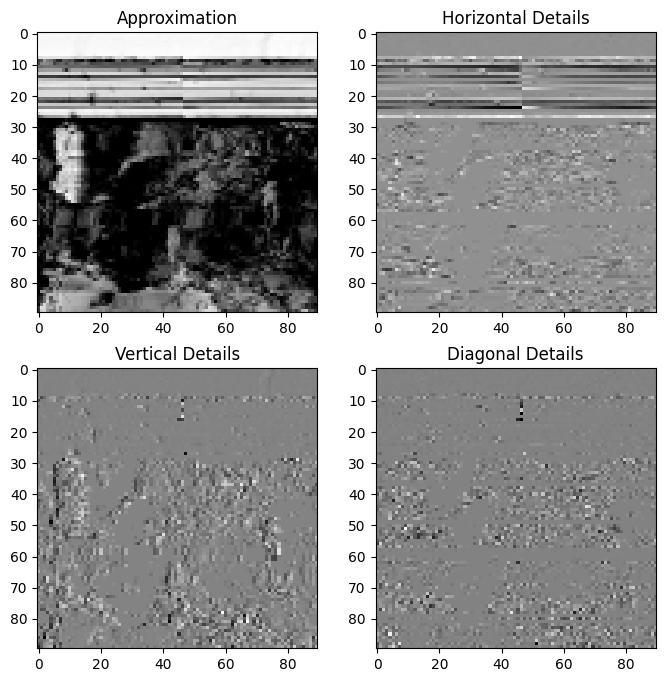

In [ ]:
# Main Execution Flow

# Load images from the folder
images, filenames = load_images_from_folder(original_folder)

# Apply DWT and save compressed images
for i, image in enumerate(images):
    cA = apply_dwt(image)
    compressed_image_path = os.path.join(compressed_folder, filenames[i])
    save_compressed_image(cA, compressed_image_path)

# Compare original and compressed image sizes
comparison_df = compare_image_sizes(original_folder, compressed_folder, filenames)

# Display the comparison in tabular form
print(comparison_df)

cA, (cH, cV, cD) = pywt.dwt2(images[0], 'haar')  # Unpack result explicitly
visualize_dwt(cA, (cH, cV, cD))


In [ ]:
import cv2
import os

original_folder = "/content/drive/MyDrive/UBI_images/amplitude"
original_images = []
for filename in os.listdir(original_folder):
    if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
        img_path = os.path.join(original_folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            original_images.append(img)

print(f"Loaded {len(original_images)} original images.")

compressed_folder = "/content/drive/MyDrive/compressed_images"
compressed_images = []
for filename in os.listdir(compressed_folder):
    if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
        img_path = os.path.join(compressed_folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            compressed_images.append(img)

print(f"Loaded {len(compressed_images)} compressed images.")

Loaded 925 original images.
Loaded 925 compressed images.


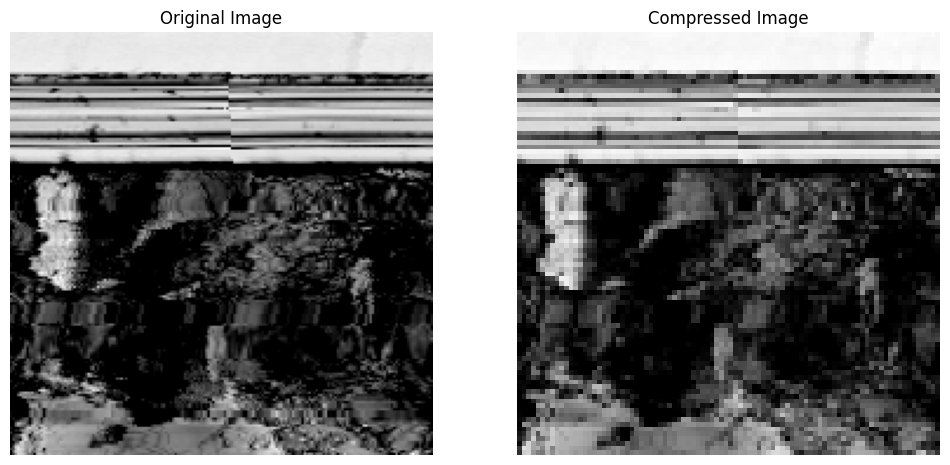

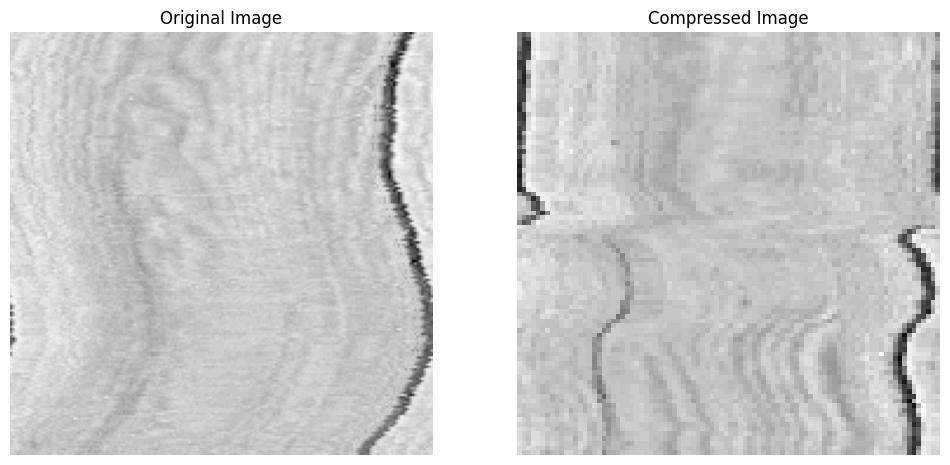

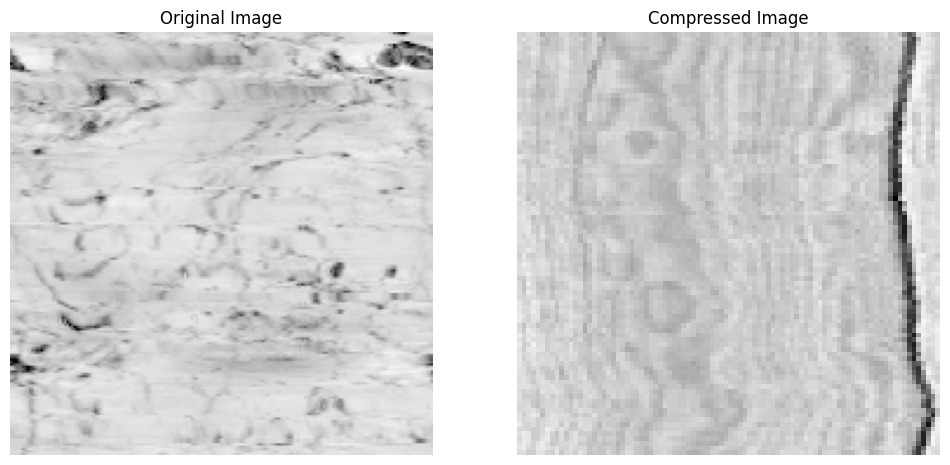

In [ ]:
import matplotlib.pyplot as plt

def compare_original_compressed(original_images, compressed_images, indices):
    """
    Visualizes the original and compressed images side by side for comparison.

    Parameters:
    - original_images: List of original images.
    - compressed_images: List of compressed images.
    - indices: List of indices for which to show comparisons.

    Returns:
    None. Displays the comparison.
    """
    for idx in indices:
        plt.figure(figsize=(12, 6))

        # Original Image
        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        plt.imshow(original_images[idx], cmap='gray')
        plt.axis('off')

        # Compressed Image
        plt.subplot(1, 2, 2)
        plt.title("Compressed Image")
        plt.imshow(compressed_images[idx], cmap='gray')
        plt.axis('off')

        plt.show()

# Example usage: Compare the first three images in the dataset
compare_original_compressed(original_images, compressed_images, indices=[0, 1, 2])


In [ ]:
import pywt
import cv2
import numpy as np
import os

reconstructed_folder = "/content/drive/MyDrive/reconstructed_images"
os.makedirs(reconstructed_folder, exist_ok=True)

def reconstruct_image_from_compressed(compressed_image):
    """
    Reconstructs an image from its approximation coefficients using IDWT.
    Args:
        compressed_image: 2D numpy array of the compressed image.
    Returns:
        Reconstructed image as a 2D numpy array.
    """
    shape = compressed_image.shape
    zeros = np.zeros(shape)

    # Combine approximation with zero detail coefficients
    coeffs = (compressed_image, (zeros, zeros, zeros))

    reconstructed_image = pywt.idwt2(coeffs, 'haar')

    reconstructed_image = np.clip(reconstructed_image, 0, 255)

    # Convert to uint8
    return reconstructed_image.astype(np.uint8)

# Process and save reconstructed images
for idx, compressed_img in enumerate(compressed_images):
    # Reconstruct the image
    reconstructed_img = reconstruct_image_from_compressed(compressed_img)

    # Save the reconstructed image
    save_path = os.path.join(reconstructed_folder, f"reconstructed_{idx + 1}.png")
    cv2.imwrite(save_path, reconstructed_img)

print(f"Reconstructed images saved to: {reconstructed_folder}")


Reconstructed images saved to: /content/drive/MyDrive/reconstructed_images


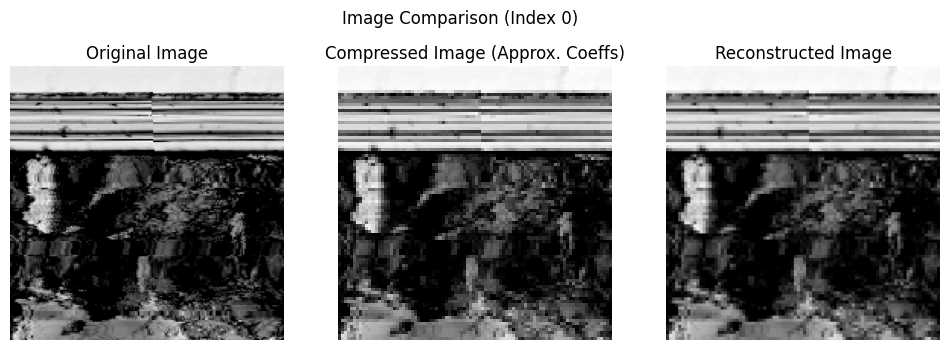

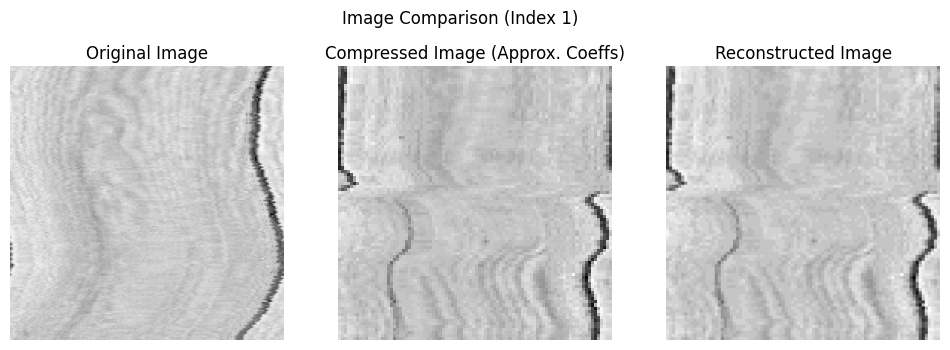

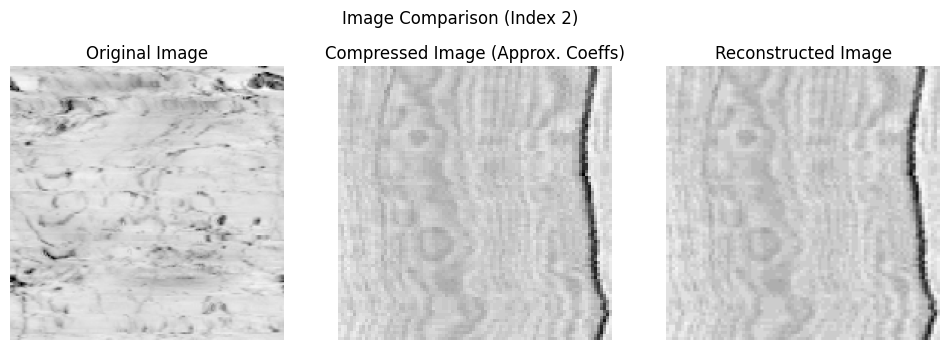

In [ ]:
import matplotlib.pyplot as plt

def compare_images(original_image, compressed_image, reconstructed_image, index):
    """
    Visualizes original, compressed, and reconstructed images side by side.
    """
    plt.figure(figsize=(12, 4))

    # Original Image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')

    # Compressed Image
    plt.subplot(1, 3, 2)
    plt.title("Compressed Image (Approx. Coeffs)")
    plt.imshow(compressed_image, cmap='gray')
    plt.axis('off')

    # Reconstructed Image
    plt.subplot(1, 3, 3)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed_image, cmap='gray')
    plt.axis('off')

    plt.suptitle(f"Image Comparison (Index {index})")
    plt.show()

for i in range(3):  # Compare first 3 images
    compare_images(original_images[i], compressed_images[i],
                   reconstruct_image_from_compressed(compressed_images[i]), i)

## CNN Based DWT

### Preparing the Dataset

In [ ]:
import os
import numpy as np
import cv2
import pywt

def prepare_dwt_dataset(folder, output_folder, wavelet='haar'):
    """Prepares a dataset with DWT components saved as 4-channel numpy arrays."""
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(folder):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            filepath = os.path.join(folder, filename)
            img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                # Perform 2D DWT decomposition
                coeffs = pywt.dwt2(img, wavelet)
                cA, (cH, cV, cD) = coeffs

                # Stack components into a single 4-channel array
                dwt_array = np.stack([cA, cH, cV, cD], axis=-1)

                # Save as a numpy array
                output_path = os.path.join(output_folder, filename.split('.')[0] + '.npy')
                np.save(output_path, dwt_array)

# Example usage
prepare_dwt_dataset('/content/drive/MyDrive/UBI_images/amplitude', '/content/drive/MyDrive/train', wavelet='haar')
prepare_dwt_dataset('/content/drive/MyDrive/UBI_images/amplitude_dynamic', '/content/drive/MyDrive/test', wavelet='haar')

### CNN-Autoencoder Architecture

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DWT_Autoencoder(nn.Module):
    def __init__(self):
        super(DWT_Autoencoder, self).__init__()

        # Encoder: Compress DWT features
        self.encoder = nn.Sequential(
            nn.Conv2d(4, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),  # Downsampling
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
        )

        # Decoder: Reconstruct DWT features
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 4, kernel_size=2, stride=2),
            nn.Sigmoid()  # Normalize output between 0 and 1
        )

    def forward(self, x):
        # Encode
        encoded = self.encoder(x)
        # Decode
        decoded = self.decoder(encoded)
        return decoded

# Initialize model
model = DWT_Autoencoder()


### Dataset Loader

In [ ]:
from torch.utils.data import Dataset, DataLoader

class DWTDataset(Dataset):
    def __init__(self, folder, transform=None):
        self.files = [os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.npy')]
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        dwt_array = np.load(self.files[idx])  # Load DWT components
        label = 0  # Replace with your labeling logic
        dwt_array = torch.tensor(dwt_array, dtype=torch.float32).permute(2, 0, 1)  # Convert to (C, H, W)
        if self.transform:
            dwt_array = self.transform(dwt_array)
        return dwt_array, label

# Example usage
train_dataset = DWTDataset('/content/drive/MyDrive/train')
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

for data, labels in train_loader:
    print(data.shape)  # Should be [batch_size, 4, H, W]
    break

torch.Size([16, 4, 90, 90])
